In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import albumentations as A
from library.dataset import CustomCloudCoverDetection
from albumentations.pytorch import ToTensorV2
from tqdm import tqdm
import matplotlib.pyplot as plt

/Users/hyeongkyunkim/miniconda3/envs/s2-cloudcover-terratorch/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


wxc_downscaling not installed
wxc_downscaling not installed


In [4]:
train_ds = CustomCloudCoverDetection(
    root = './dataset',
    split = 'train',
    transforms=[A.Normalize(normalization='min_max_per_channel'), ToTensorV2()],
    download=False
    )

val_ds = CustomCloudCoverDetection(
    root = './dataset',
    split = 'val',
    transforms=[A.Normalize(normalization='min_max_per_channel'), ToTensorV2()],
    download=False
    )

test_ds = CustomCloudCoverDetection(
    root = './dataset',
    split = 'test',
    transforms=[A.Normalize(normalization='min_max_per_channel'), ToTensorV2()],
    download=False
    )

len(train_ds), len(val_ds), len(test_ds)

(157, 73, 215)

# Statistics

In [5]:
train_df = train_ds.metadata.sort_values('chip_id')
train_df.head()

,chip_id,location,datetime,cloudpath
0,afxz,Chifunfu,2020-04-29T08:20:47Z,az://./train_features/afxz
1,agex,Chifunfu,2020-04-29T08:20:47Z,az://./train_features/agex
2,agtu,Chifunfu,2020-04-29T08:20:47Z,az://./train_features/agtu
3,ahtj,Chifunfu,2020-04-29T08:20:47Z,az://./train_features/ahtj
4,alyp,Addis Ababa,2020-09-10T07:57:42Z,az://./train_features/alyp


<Axes: title={'center': 'Training sample counts by location'}, xlabel='location', ylabel='counts'>

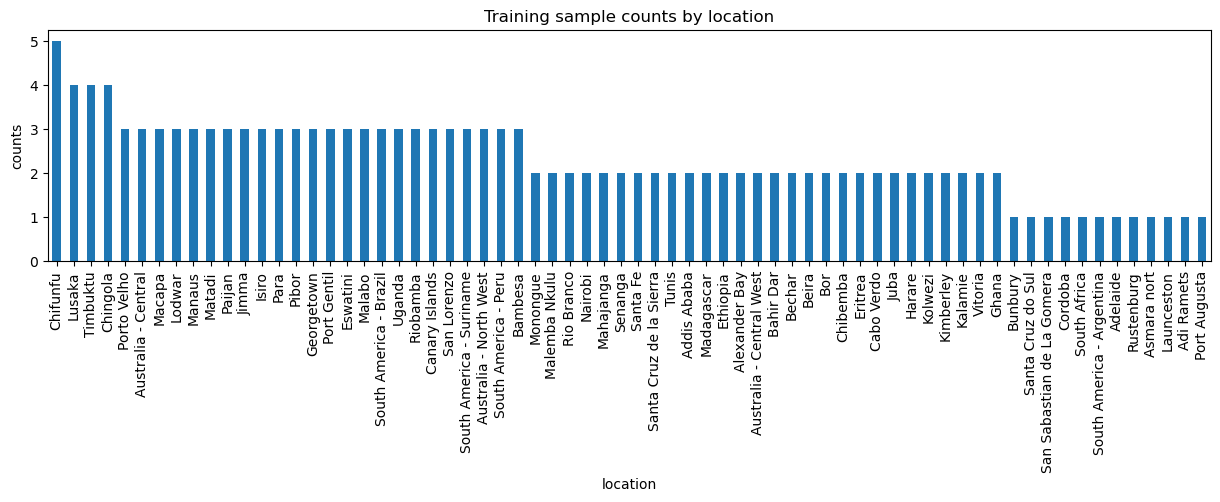

In [6]:
train_df_by_loc = train_df.groupby('location').count()
train_df_by_loc['chip_id'].sort_values(ascending=False).plot(figsize=(15,3), kind='bar', ylabel='counts', 
                                                          title='Training sample counts by location')

In [7]:
val_df = val_ds.metadata.sort_values('chip_id')
val_df.head()

,chip_id,location,datetime,cloudpath
0,aewm,Chifunfu,2020-04-29T08:20:47Z,az://./train_features/aewm
1,ajxq,Addis Ababa,2020-09-10T07:57:42Z,az://./train_features/ajxq
2,arsa,Bahir Dar,2020-09-08T08:06:56Z,az://./train_features/arsa
3,aswc,Chingola,2020-07-26T08:33:40Z,az://./train_features/aswc
4,aszi,Chingola,2020-07-26T08:33:40Z,az://./train_features/aszi


<Axes: title={'center': 'Validation sample counts by location'}, xlabel='location', ylabel='counts'>

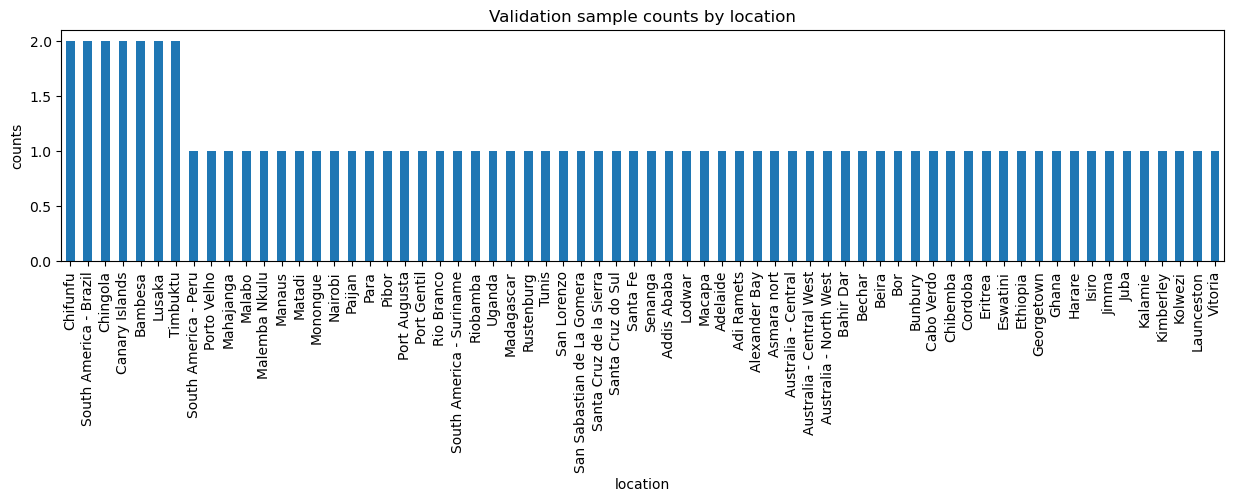

In [8]:
val_df_by_loc = val_df.groupby('location').count()
val_df_by_loc['chip_id'].sort_values(ascending=False).plot(figsize=(15,3), kind='bar', ylabel='counts', 
                                                          title='Validation sample counts by location')

In [9]:
test_df = test_ds.metadata.sort_values('chip_id')
test_df.head()

,chip_id,location,datetime
0,abft,Australia - Central East,2020-06-03T00:55:26Z
1,adgb,Australia - Central East,2020-06-03T00:55:26Z
2,advd,Australia - Central East,2020-06-03T00:55:26Z
3,awhj,Luanda,2020-09-07T09:33:08Z
4,axel,Luanda,2020-09-07T09:33:08Z


<Axes: title={'center': 'Test sample counts by location'}, xlabel='location', ylabel='counts'>

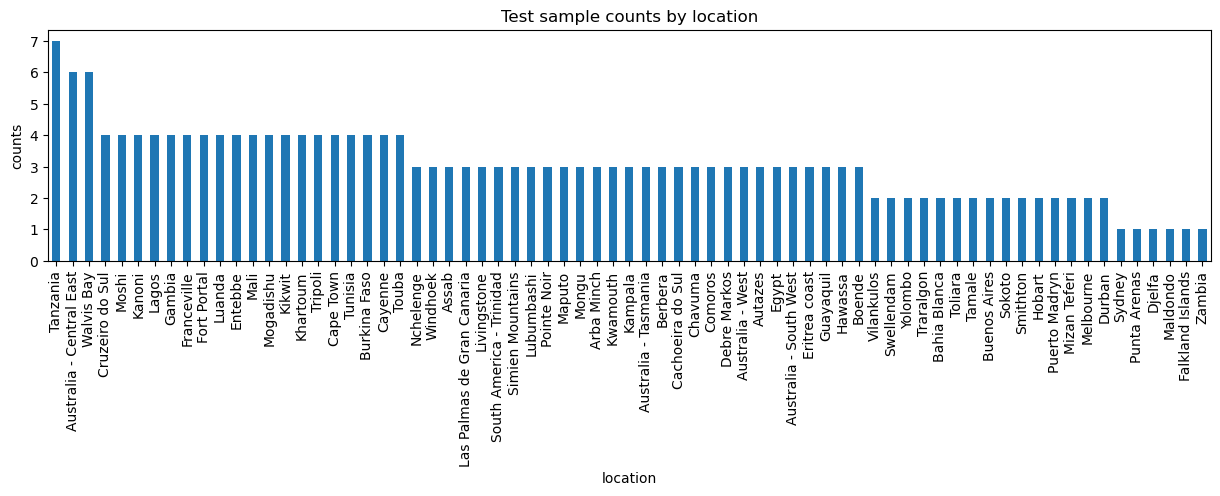

In [10]:
test_df_by_loc = test_df.groupby('location').count()
test_df_by_loc['chip_id'].sort_values(ascending=False).plot(figsize=(15,3), kind='bar', ylabel='counts', 
                                                          title='Test sample counts by location')

In [11]:
label_counts = [0, 0]

for i in tqdm(range(len(train_ds))):

    mask = train_ds[i]['mask'].numpy()
    labels, counts = np.unique(mask, return_counts=True)

    for idx, label in enumerate(labels):
        label_counts[label] = label_counts[label] + counts[idx]

100%|██████████| 157/157 [00:09<00:00, 15.96it/s]


Text(0.5, 1.0, 'Label Counts in Traing Masks\n(No : 15401068, Cloud : 25755540)')

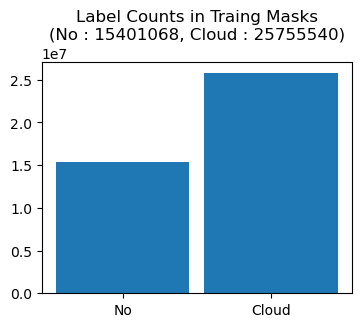

In [12]:
plt.figure(figsize=(4,3))
plt.bar(['No','Cloud'], label_counts, width=0.9)
plt.title(f"Label Counts in Traing Masks\n" \
          f"(No : {label_counts[0]}, Cloud : {label_counts[1]})")

# Visualization

strh
odfe
ymyn


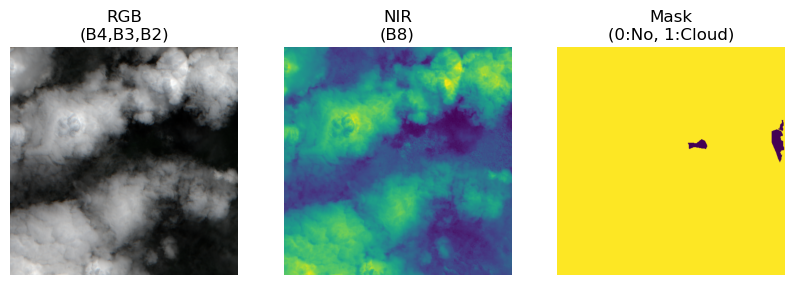

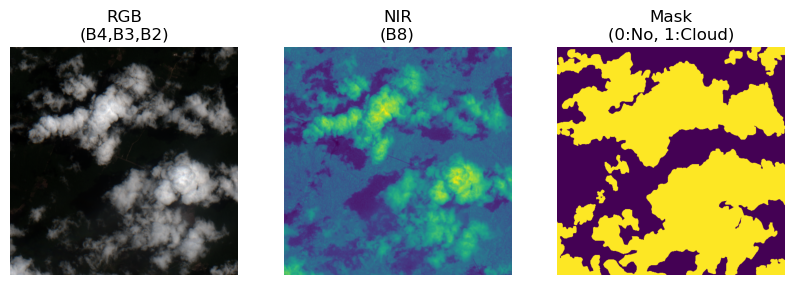

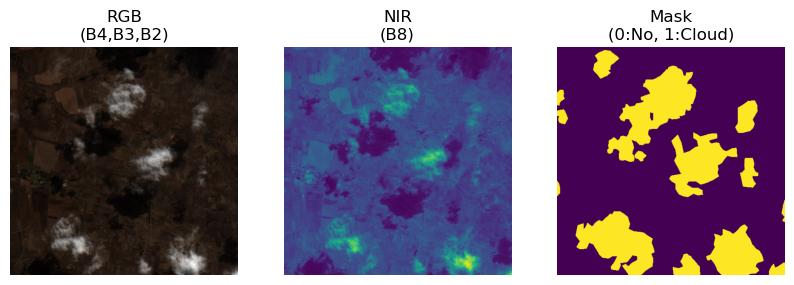

In [13]:
idxs = np.random.randint(0, len(train_ds)-1, 3)

for i, idx in enumerate(idxs):
    print(train_ds.metadata.loc[idx,'chip_id'])
    train_ds.plot(train_ds[idx])

mxou
djur
xvbz


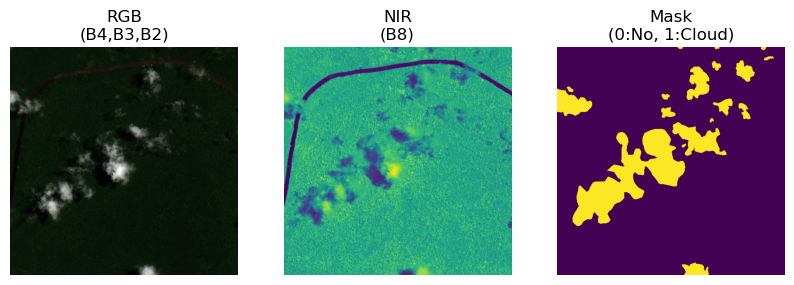

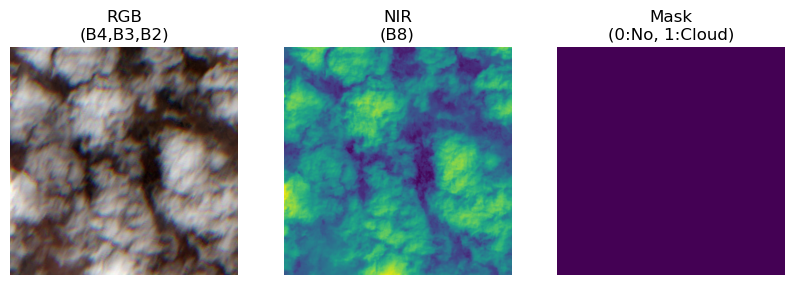

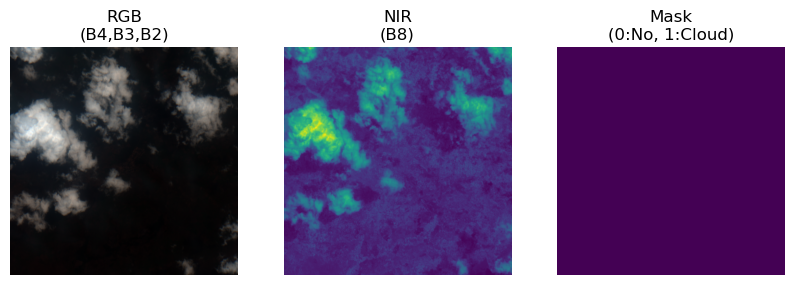

In [17]:
idxs = np.random.randint(0, len(val_ds)-1, 3)

for i, idx in enumerate(idxs):
    print(val_ds.metadata.loc[idx,'chip_id'])
    val_ds.plot(val_ds[idx])

qwpq
epof
mgrb


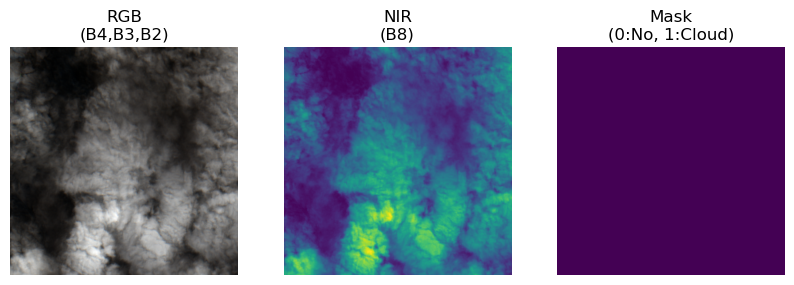

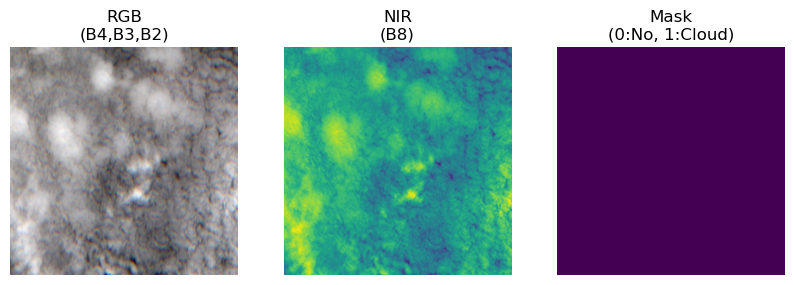

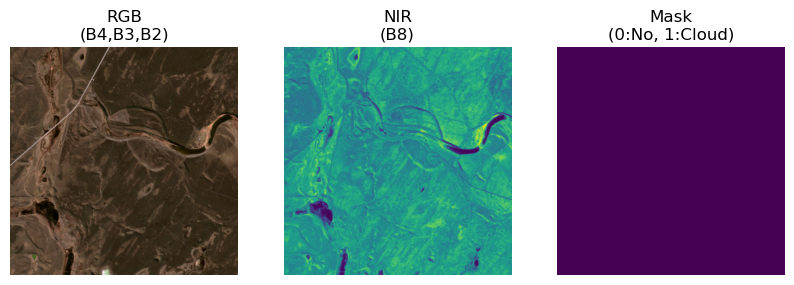

In [18]:
idxs = np.random.randint(0, len(test_ds)-1, 3)

for i, idx in enumerate(idxs):
    print(test_ds.metadata.loc[idx,'chip_id'])
    test_ds.plot(test_ds[idx])